# Cluster Segmentation

In [34]:
# PACKAGES NEEDED

import numpy as np
import pandas as pd
from IPython.display import display
# Allows the use of displa*y() for DataFrames

import datetime as DT
import io

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Import supplementary visualizations code visuals.py
import visuals as vs
import helper
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

In [8]:
### import data

try:
    orgaos = pd.read_csv("data/tb_servicos_modified.csv")
    orgaos.drop(['id_servico'], axis = 1, inplace = True)
    orgaos.drop_duplicates('nome_orgao')
    print("Orgaos dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset orgaos could not be loaded. Is the dataset missing?")
    
try:
    data = pd.read_csv("data/pessoas.csv")
    #data.drop(['id_servico'], axis = 1, inplace = True)
    #data.drop_duplicates('nome_orgao')
    print("Dataset pessoas has {} samples with {} features each.".format(*data.shape))
except:
    print("Pessoas dataset could not be loaded. Is the dataset missing?")

Dataset orgaos could not be loaded. Is the dataset missing?
Dataset pessoas has 104632 samples with 14 features each.


/home/barbosa/Libraries/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,3,6,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
orgaos.head()

,id_orgao,nome_orgao
0,37534,Ministério da Saúde (MS)
1,36802,Instituto Nacional do Seguro Social (INSS)
2,58051,Agência Nacional de Mineração (ANM)
3,822,Advocacia-Geral da União (AGU)
4,37547,Ministério do Turismo (MTur)


In [10]:
data.set_index('cpf')
data.sort_index()
data = data.loc[0:9998, :]

features_raw = data.dropna()

features_raw.drop(['nome', 'cpf', 'ano_ingresso'], axis = 1, inplace = True)

/home/barbosa/Libraries/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['renda', 'idade', 'n_filhos']

features_log_minmax_transform = pd.DataFrame(data = features_raw)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

/home/barbosa/Libraries/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,uf,n_filhos,conta,sexo,cor,emprego,cnh,sus,empresa,renda,idade
0,Maranhão,0.0,Ativo,M,BRANCA,S,S,N,S,0.000000,0.000000
1,Minas Gerais,0.0,Ativo,M,PARDA,N,N,N,N,0.003341,0.011765
2,Rio Grande do Sul,0.0,Ativo,F,BRANCA,S,S,N,N,0.000000,0.047059
3,São Paulo,0.0,Ativo,M,PARDA,N,N,N,N,0.010024,0.200000
4,Rio Grande do Sul,0.0,Ativo,M,BRANCA,S,S,N,N,0.013365,0.070588


In [12]:
features_final = pd.get_dummies(features_log_minmax_transform)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

63 total features after one-hot encoding.
['n_filhos', 'renda', 'idade', 'uf_Acre', 'uf_Alagoas', 'uf_Amapá', 'uf_Amazonas', 'uf_Bahia', 'uf_Bandundu', 'uf_Bissau Autonomous Region', 'uf_Canindeyú', 'uf_Ceará', 'uf_Distrito Federal', 'uf_Espírito Santo', 'uf_Goiás', 'uf_Indiana', 'uf_Lisbon', 'uf_Maldonado', 'uf_Maranhão', 'uf_Mato Grosso', 'uf_Mato Grosso do Sul', 'uf_Minas Gerais', 'uf_Paraná', 'uf_Paraíba', 'uf_Pará', 'uf_Pernambuco', 'uf_Piauí', 'uf_Porto Novo', 'uf_Ribeira Brava', 'uf_Rio Grande do Norte', 'uf_Rio Grande do Sul', 'uf_Rio de Janeiro', 'uf_Rondônia', 'uf_Santa Catarina', 'uf_Sergipe', 'uf_São Filipe', 'uf_São Paulo', 'uf_Tacuarembó', 'uf_Texas', 'uf_Tocantins', 'uf_Västra Götaland', 'uf_Île-de-France', 'conta_Ativo', 'conta_Bloqueado', 'conta_Inativo', 'conta_Inibido', 'conta_Suspenso', 'sexo_F', 'sexo_M', 'cor_AMARELA', 'cor_BRANCA', 'cor_INDÍGENA', 'cor_NÃO QUERO DECLARAR', 'cor_PARDA', 'cor_PRETA', 'emprego_N', 'emprego_S', 'cnh_N', 'cnh_S', 'sus_N', 'sus_S', 'em

In [51]:
from sklearn.cluster import KMeans

#Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=5, random_state=0).fit(features_final)

# use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(features_final)

# Plot
predictions

array([3, 2, 4, ..., 1, 4, 1], dtype=int32)

In [52]:
features_final.head()

,n_filhos,renda,idade,uf_Acre,uf_Alagoas,uf_Amapá,uf_Amazonas,uf_Bahia,uf_Bandundu,uf_Bissau Autonomous Region,...,cor_PARDA,cor_PRETA,emprego_N,emprego_S,cnh_N,cnh_S,sus_N,sus_S,empresa_N,empresa_S
0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
1,0.0,0.003341,0.011765,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,0.0,0.000000,0.047059,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
3,0.0,0.010024,0.200000,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,0.0,0.013365,0.070588,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0


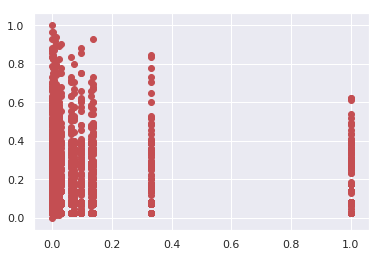

In [53]:
X = features_final
plt.scatter(X['renda'], X['idade'], c='r', marker='o');

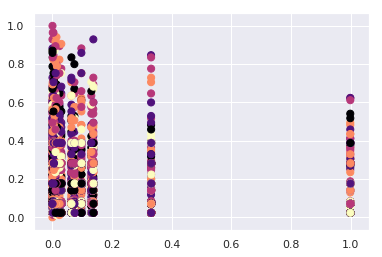

In [59]:
plt.scatter(X['renda'], X['idade'], c=predictions, s=50, cmap='magma')

In [29]:
orgaos.head()

,id_orgao,nome_orgao
0,37534,Ministério da Saúde (MS)
1,36802,Instituto Nacional do Seguro Social (INSS)
2,58051,Agência Nacional de Mineração (ANM)
3,822,Advocacia-Geral da União (AGU)
4,37547,Ministério do Turismo (MTur)


In [55]:
tipo_notificacao = ['campanha_vacinacao', 'eventos', 'alerta_urgencia', 'justificativa_eleitoral']